### 트랜스포머 블록

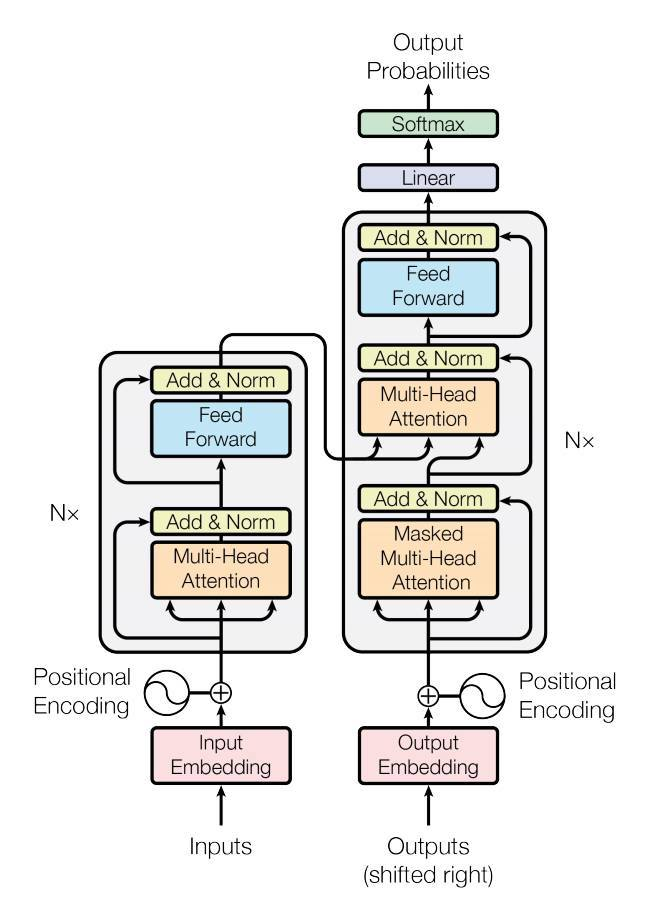

In [ ]:
torch.nn.Transformer(d_model=512, nhead=8, num_encoder_layers=6, 
num_decoder_layers=6, dim_feedforward=2048, dropout=0.1, activation=<function relu>,
custom_encoder=None, custom_decoder=None, layer_norm_eps=1e-05, batch_first=False, 
norm_first=False, device=None, dtype=None)

transformer_model = nn.Transformer(nhead=16, num_encoder_layers=12)
src = torch.rand((10, 32, 512))
tgt = torch.rand((20, 32, 512))
out = transformer_model(src, tgt)

- 참고 도서에 나온 이미지와는 다르지만 [위키독스](https://wikidocs.net/156986) 에서 제공하는 이미지로 대체.
- 왼쪽 block은 encoder이며, 오른쪽 block 은 decoder.
- 직접 구현하는 것은 아주 오래걸리나, pytorch에서 [nn.Transformer](https://pytorch.org/docs/stable/generated/torch.nn.Transformer.html#transformer) 로 구현되어 있다.
- 트랜스포머는 전체 구조에서 중앙 부분, 멀티헤드 어텐션과 피드포워드 등을 처리하며, Linear, Positional Encoding, Embedding 등은 따로 구현해야한다.

- 주요 구성 요소는 다음과 같다.
토큰화
- 입력 텍스트를 개별 토큰으로 나눈다. 각 토큰에는 토큰 임베딩을 참조하는 데 사용 하는 고유한 ID가 있다.

입력 토큰 임베딩(input token Embedding)
- 토큰을 Embedding이라는 vector로 표현한다. 이러한 임베딩은 각 토큰의 기본 정보를 담는 수치 표현이다. 학습 과정에서 모델은 각 토큰을 해당 임베딩에 매핑하는 방법을 학습한다. 토큰 임베딩은 입력 시퀀스 내의 위치와 관계없이 동일하다.

위치 인코딩(Positional embedding)
- 트랜스포머 모델은 순서 개념이 없기에 토큰 임베딩에 위치 정보를 추가해야한다. 토큰 임베딩에 Positional embedding을 더하는 방식으로 수행한ㄷ. 위치 인코딩은 입력 시퀀스에서 각 토큰의 위치를 표현하는 vector 집합이다.

트랜스포머 블록(Transformer Block)
- 트랜스포머 모델의 핵심인 Transformer Block. 트랜스포머의 성능은 여러 블록을 쌓아 입력 토큰 간의 더 복잡하고 추상적인 관계를 학습하도록 하는 데서 나온다.
    - 셀프 어텐션 메커니즘(Self attention)
        - 전체 시퀀스의 맥락에서 각 토큰의 중요도를 평가할 수 있게 한다. 이 매커니즘은 트랜스포머가 장거리 의존성과 단어간 복잡한 관계를 파악할 수 있게 하며, 문맥에 맞는 일관된 텍스트를 생성하도록 돕는다.
    - 피드포워드 신경망(feed-forward neural network)
        - 셀프 어텐션의 출력을 feed-forward neural network를 통과시켜 입력 시퀀스의 표현을 더 정교하게 만든다.
문맥 임베딩
- 트랜스포머 블록의 출력은 입력 시퀀스에서 토큰 간의 관계를 포착하는 contextual embedding의 집합이다. 
- 입력 임베딩은 각 토큰에 고정되지만, 문맥 임베딩은 토큰간의 관계에 기반하여 트랜스포머 모델의 각 계층에서 업데이트된다. 
- 문맥 임베딩은 토큰이 나타내는 문맥의 풍부하고 복잡한 의미 정보를 표현한다.

예측
- 추가 층이 최종 표현을 작업별 최종 출력으로 처리한다. 
- 텍스트 생성에서는 선형 계층을 통해 무맥 임베딩을 모델의 어휘 사전에 있는 가능한 모든 단어에 매핑하며, 이후 소프트 맥스 연산을 수행해 시퀀스의 다음 토큰을 예측한다.

### 트랜스포머 모델 계보

시퀀스-투-시퀀스(Sequence-to-Sequence, seq2seq)
- 처음에 기재되어 있는 이미지의 인코더-디코더형 아키텍처라는 구조로 이루어져 있다. 이는 2023년까지 인기있는 구조였으나, 현재는 디코더만으로 결과를 얻어내고 있다.
- 트랜스포머 논문은 seq2seq 작업의 예시로 기계 번역에 초점을 맞췄다. 당시 기계 번역 분야에서 최고 성능이었던 LSTM(long short-term memory)과 GRU(gated recurrent unit) 같은 RNN 모델이었다.
- 하지만 seq2seq를 기점으로 어텐션 방식에만 집중해 학습 난이도, 성능, 안정성, 확장성 거의 모든 부분에서 뛰어남을 입증했다.
- 예를 들어 영어 문장을 인코더에 입력하면 그 문장의 의미를 포괄적으로 담은 수치화된 임베딩 데이터가 생성되고, 디코더는 이 임베딩 데이터를 사용해 영어 문장과 대치되는 프랑스어 문장을 생성한다.
- 이미지에서 볼 수 있듯, 이 출력은 예측은 생성된 직전 토큰 뿐만 아니라 인코더의 출력도 함께 고려된다.

- 인코더의 출력을 디코더 스택에 통합하는 매커니즘을 교차 어텐션(cross-attention)라고 한다. 이는 셀프 어텐션과 유사하지만 입력의 각 토큰이 자신의 시퀀스 내의 다른 토큰이 아닌 인코더에서 전달된 정보에 주목하는 점이 다르다.
- 교차 어텐션 층은 셀프 어텐션 층과 교차해서 배치되며 이를 통해 디코더는 자체 시퀀스 내의 정보와 인코더에서 전달된 정보를 함께 사용할 수 있다.

- 트랜스포머 논문이 발표된 이후, Marian NMT 같은 기존 seq2seq2 모델들은 이런 기법을 아키텍처 핵심으로 도입했다.
- 이를 바탕으로 개발된 모델 중 주목할 만한 것이 BART(nidrectional and auto-regessive transformers)이다.

BART
- 사전 학습 과정에서 BART는 입력 시퀀스의 일부를 고의로 손상시키고 디코더 출력에서 이를 복원하려고 시도한다.
- 이를 통해 사전 학습 과정에서 얻은 풍부한 시퀀스 표현을 활용해 다른 생성 작업(번역,요약)에 맞게 파인 튜닝된다.
- 이 입력 손상(input corruption)은 이후 디퓨전 모델의 핵심 아이디어가 된다.

인코더 전용 모델
- 앞서 실습에서 디코더 전용, 즉 자기회귀 모델을 실습해보았다. 이는 chatGPT, Claude, lama 등에서 성능을 입증했다.
- 한편 인코더 모델을 텍스트 시퀀스로부터 풍부한 의미를 추출하는 데 특화되었다. 이를 텍스트 분류 작업에 활용할 수 있으며, 검색 시스템에서 다량의 문서를 의미론적 semantic Embedding으로 변환하는 데도 사용한다.
- 트랜스포머 인코더 모델 중 가장 유명한 것은 BERT(bidrectional encoder representaition from transformers)이다. BERT는 텍스트의 일부를 마스킹하여 예측하는 masked language modeling (MLM) 방식을 도입했고 이후 BART 모델에 채택되어 발전하였다.
